<a href="https://colab.research.google.com/github/Projas-14/Inteligencia_artificial/blob/master/Clasificacion%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3: Clasificación
**Inteligencia Artificial - ICI3244**

Integrantes:
*   Victor Granda
*   Ramiro Magnatera
*   Benjamin Rojas
*   Paul Rojas
*   Vicente Sarabia

In [ ]:
!git clone "https://github.com/benjarojas/lab2_ia.git" # clone dataset -> lab2_ia/

Cloning into 'lab2_ia'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), 93.18 KiB | 2.91 MiB/s, done.


In [ ]:
# Importa las bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
# Importa las funciones y la clase SVC
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
# Importa la clase de árbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

sns.set_style('darkgrid')

In [ ]:
# Almacena los datos en el DataFrame llamado "dataset_red" y "dataset_white".
dataset_red = pd.read_csv(os.path.join("lab2_ia/", "winequality-red.csv"), sep=";")
dataset_white = pd.read_csv(os.path.join("lab2_ia/", "winequality-white.csv"), sep=";")

## EDA Dataset Red

In [ ]:
# Devuelve las dimensiones (número de filas y columnas).
dataset_red.shape

(1599, 12)

In [ ]:
# Tipo de datos de cada columna
dataset_red.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
# Muestra las primeras filas del DataFrame
dataset_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


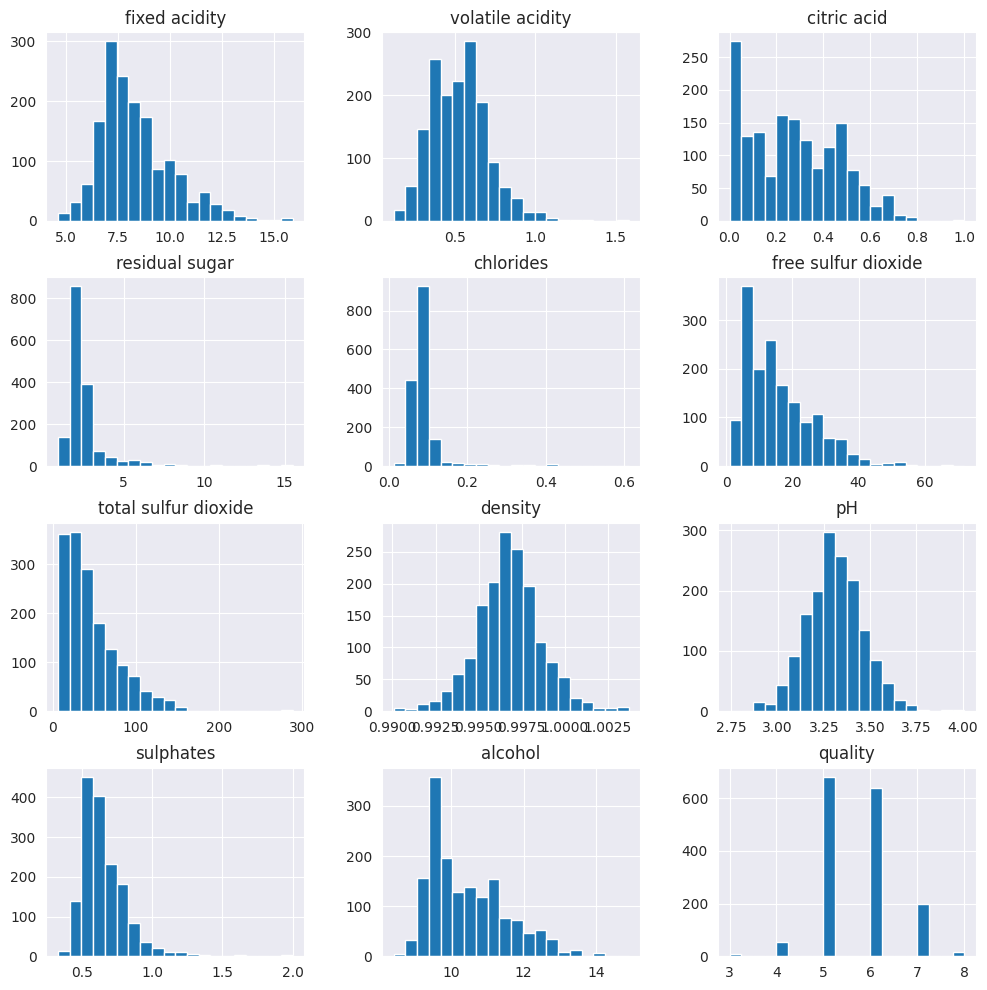

In [ ]:
# Histograma para cada columna del DataFrame
dataset_red.hist(figsize=(12,12),bins=20)
plt.show()

Para efectos de este laboratorio, se ha decidido poner énfasis en la densidad de los datos, especialmente para tener una idea de qué esperar en los resultados. Debido a que la mayoría de los vinos se encuentran con una calificación de calidad de 5 o más, es de esperar que los modelos a implementar pudiesen tener una tendencia a clasificar de con categoría "average" o "high quality", ya que es a esa clase a la que pertenecerían la mayoría de los datos de entrenamiento.

In [ ]:
# Calcula estadísticas descriptivas para cada columna y transpone los resultados para mostrarlos en formato de columnas.
dataset_red.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [ ]:
dataset_red.var() # Varianza

fixed acidity              3.031416
volatile acidity           0.032062
citric acid                0.037947
residual sugar             1.987897
chlorides                  0.002215
free sulfur dioxide      109.414884
total sulfur dioxide    1082.102373
density                    0.000004
pH                         0.023835
sulphates                  0.028733
alcohol                    1.135647
quality                    0.652168
dtype: float64

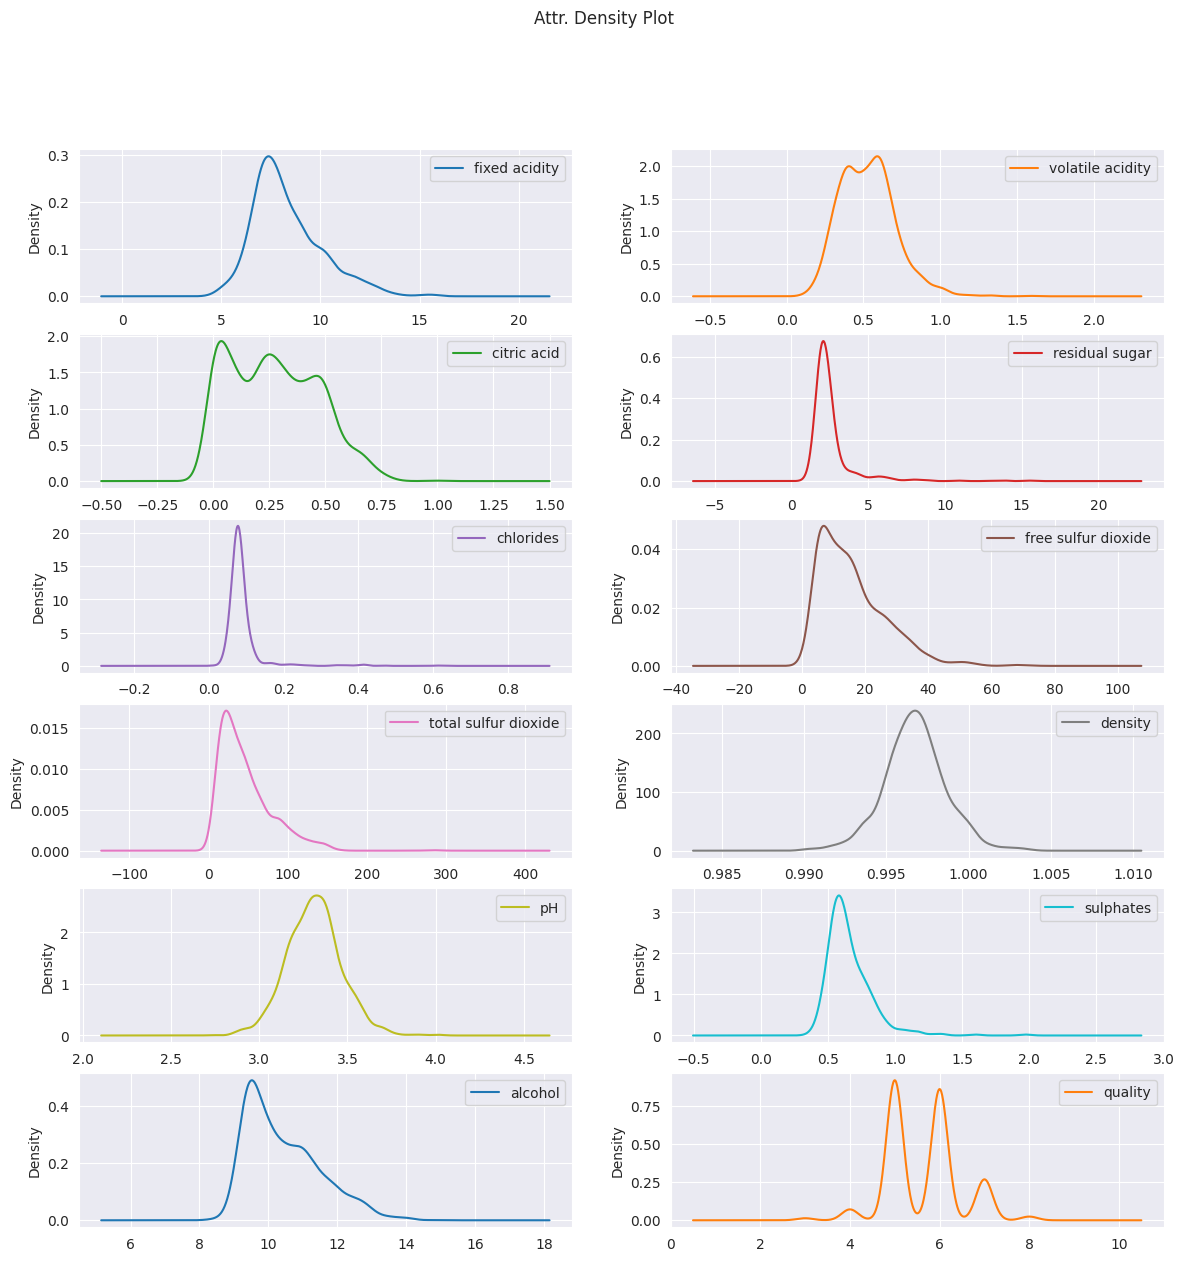

In [ ]:
# Genera gráficos de densidad
# Distribución por atributo
dataset_red.plot(kind='density',figsize=(14,14),subplots=True,layout=(6,2),title="Attr. Density Plot",sharex=False)
plt.show()

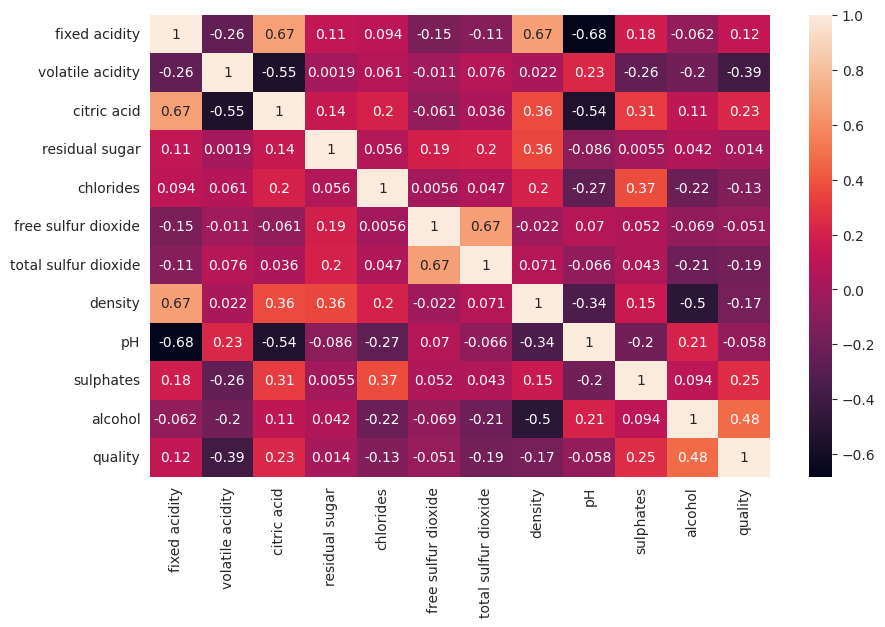

In [ ]:
# Calcula la matriz de correlación utilizando el método de Pearson
correlation=dataset_red.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(dataset_red.corr(), ax=ax, annot=True)
plt.show()

También se vuelve a revisar la correlación entre los distintos atributos del dataset, también para tener una idea, por ejemplo, de en base a qué características $k$ los algoritmos de árboles de decisión y random forest armarán cada estructura.

Visualizando la tabla de correlaciones se podría esperar a priori el uso de las etiquetas **alcohol, sulphates, total sulfur dioxide, density, volatile acidity, citric acid y fixed acidity.**

## EDA Dataset White

In [ ]:
# Devuelve las dimensiones (número de filas y columnas).
dataset_white.shape

(4898, 12)

In [ ]:
# Tipo de datos de cada columna
dataset_white.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
# Muestra las primeras filas del DataFrame
dataset_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


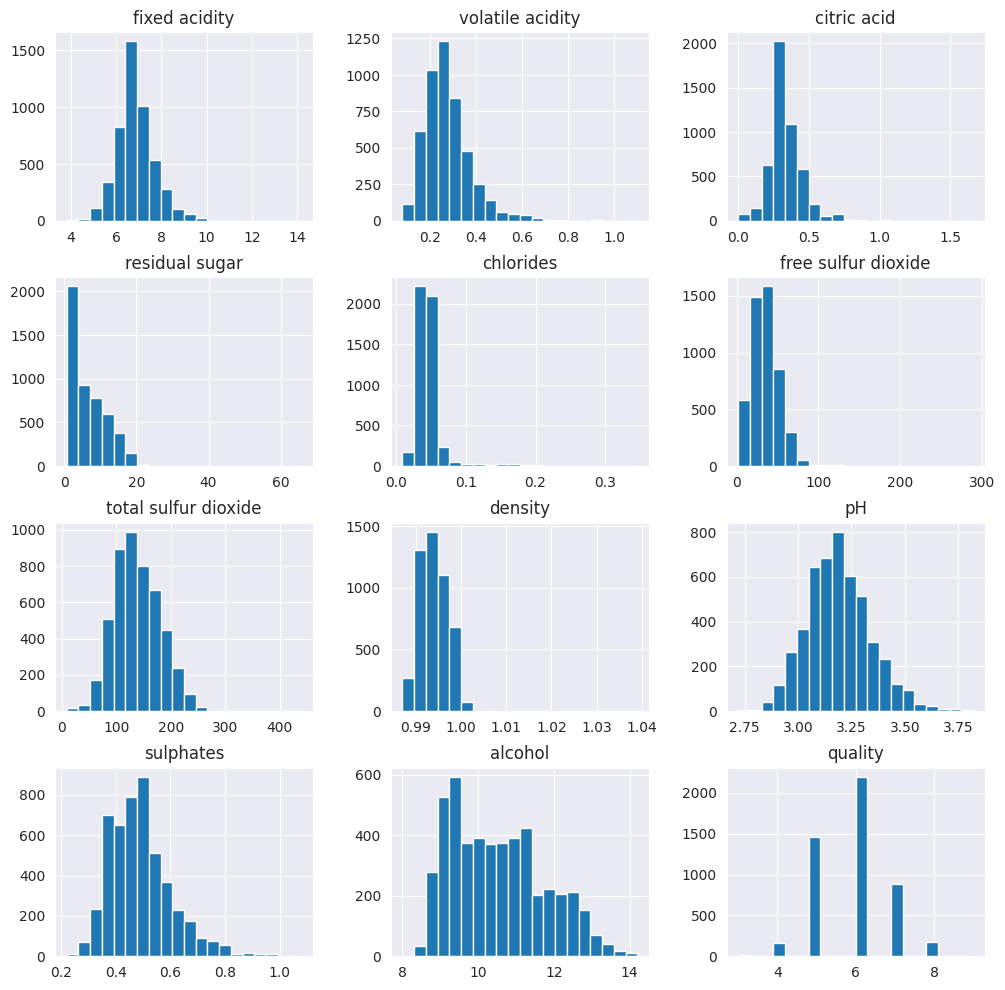

In [ ]:
# Histograma para cada columna del DataFrame
dataset_white.hist(figsize=(12,12),bins=20)
plt.show()

Utilizando los mismos criterios y gráficos que sirvieron para el EDA del dataframe anterior, podemos observar un cambio en la distribución de los datos, siendo esta menos uniforme, y con una clara tendencia para los vinos etiquetados con 5 y 6. Por ende sería de esperar que los modelos a implementar para este dataset estén con una cierta tendencia a clasificar de manera parecida al dataset de vinos rojos, poca cantidad de "low quality", alta cantidad de "average" y "high quality".

In [ ]:
#Calcula estadísticas descriptivas para cada columna y transpone los resultados para mostrarlos en formato de columnas.
dataset_white.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [ ]:
dataset_white.var() # varianza

fixed acidity              0.712114
volatile acidity           0.010160
citric acid                0.014646
residual sugar            25.725770
chlorides                  0.000477
free sulfur dioxide      289.242720
total sulfur dioxide    1806.085491
density                    0.000009
pH                         0.022801
sulphates                  0.013025
alcohol                    1.514427
quality                    0.784356
dtype: float64

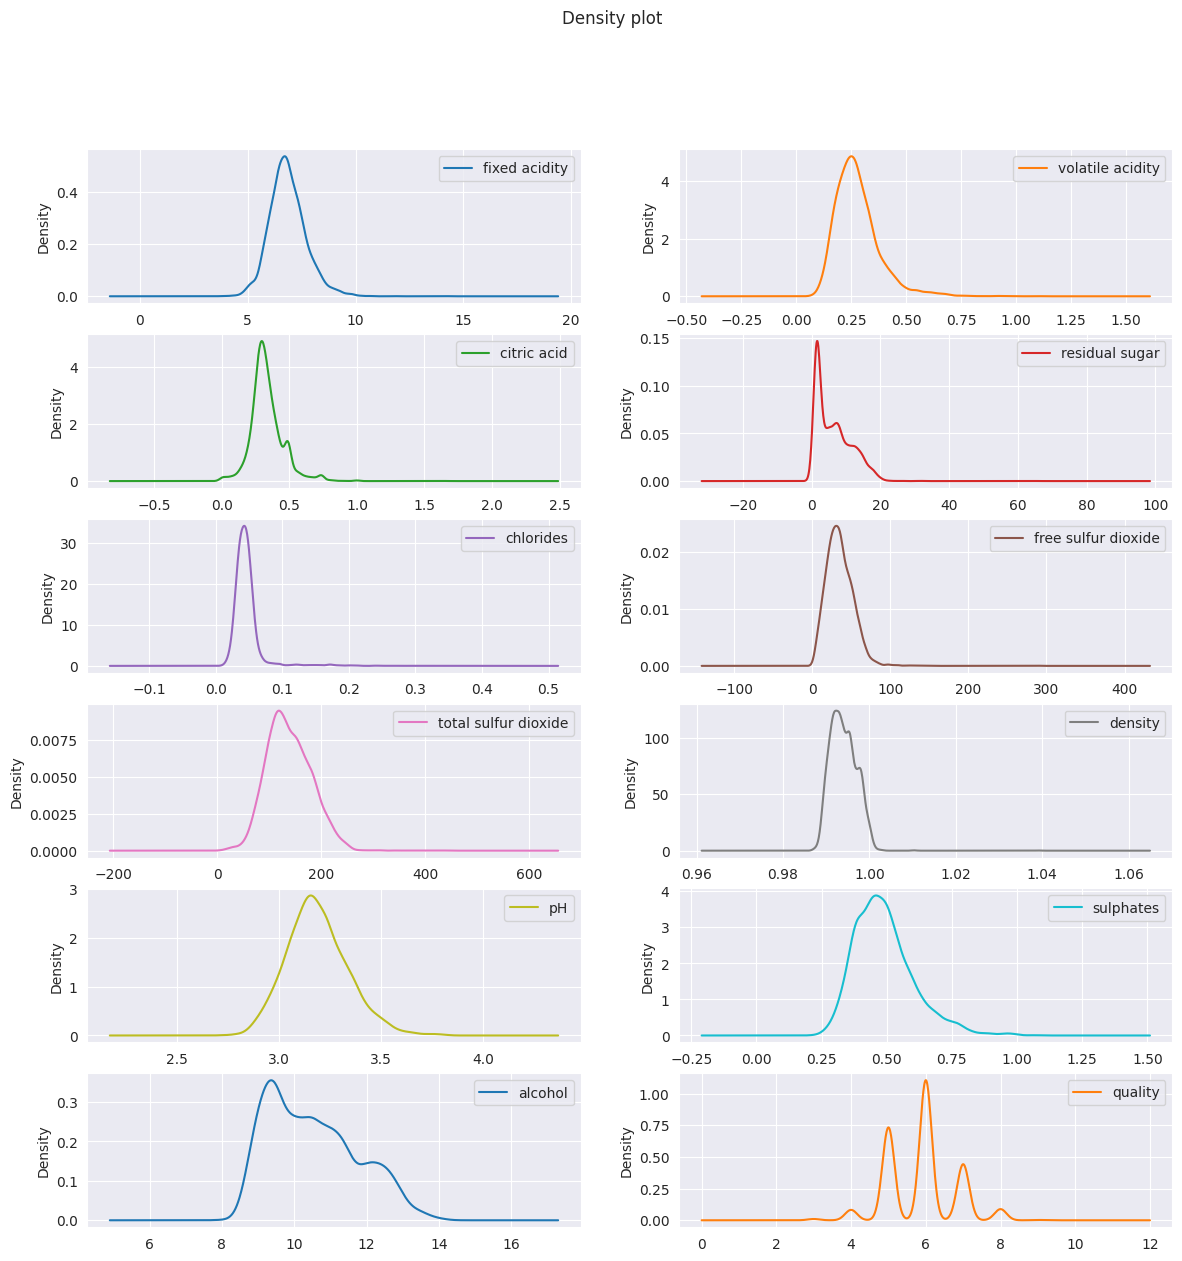

In [ ]:
# Genera gráficos de densidad
# Distribución por atributo
dataset_white.plot(kind='density',figsize=(14,14),subplots=True,layout=(6,2),title="Density plot",sharex=False)
plt.show()

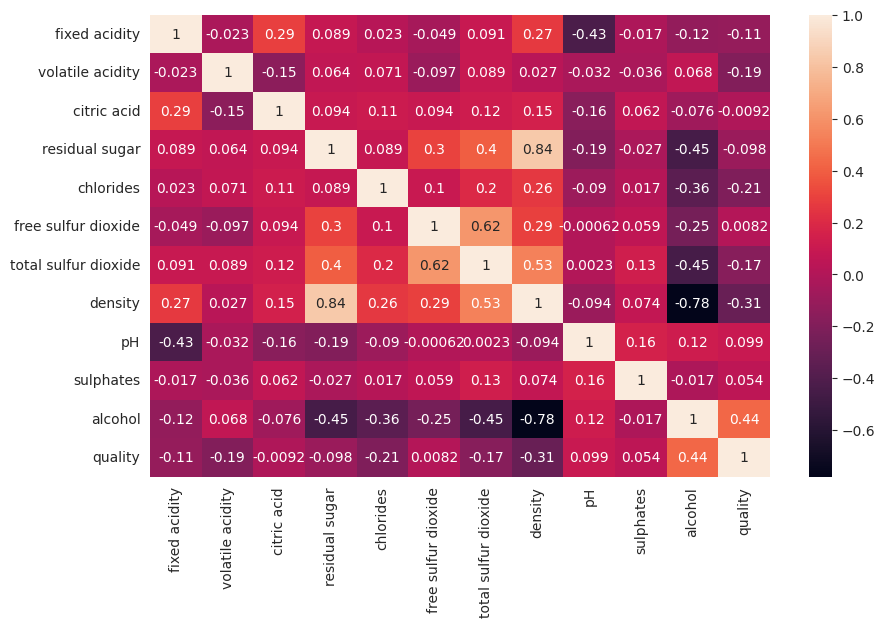

In [ ]:
# Calcula la matriz de correlación utilizando el método de Pearson
correlation=dataset_white.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(dataset_white.corr(), ax=ax, annot=True)
plt.show()

Por otro lado, las correlaciones indican una alta influencia del **alcohol** nuevamente, y en este caso aparece el **ph** como un indicador relevante, junto con los **sulphates, denisity, chlorides**.

## Clasificación SVM Dataset Red

Para la implementación del modelo basado en SVM se utilizarán las funciones que proporciona la librería sci-kit learn. Para esto se hará uso de la clase SVC que implementa una support vector machine que se debe ajustar a los datos de entrenamiento. El uso de esta clase es conveniente para efectos de este laboratorio debido a que no se dispone de una gran cantidad de datos, por lo cual el tiempo de ejecución no representa un inconveniente.

In [ ]:
# Crea la variable "X_red" asignándole el DataFrame dataset_red sin la columna "quality".
X_red = dataset_red.drop('quality', axis=1)
# Crea la variable y_red asignándole la columna "quality" del DataFrame dataset_red.
y_red = dataset_red['quality']

# Utilizando una función lambda transforma los valores de y_red asignando las etiquetas
# "lowquality" si el valor es menor a 5
# "average" si es igual a 5
# "highquality" en caso contrario.
y_red = y_red.apply(lambda x: 'lowquality' if x < 5 else 'average' if x == 5 else 'highquality')

# Realiza la división de los datos en conjuntos de entrenamiento y prueba (30% Test, 70% Training)
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.3, random_state=42)

# Crea una instancia de la clase SVC
svm_red = SVC(kernel="poly", degree=5, coef0=1, C=5)

# Ajusta el modelo utilizando los datos de entrenamiento
svm_red.fit(X_train_red, y_train_red)

# Realizar predicciones en el conjunto de prueba
y_pred_red = svm_red.predict(X_test_red)

# Genera informe de clasificación
reporte_dic=classification_report(y_test_red, y_pred_red,zero_division=0,output_dict=True)

# Generacion de la tabla de valores
df = pd.DataFrame(reporte_dic)
columnas_seleccionadas = ['highquality','average', 'lowquality']
df_seleccionado = df[columnas_seleccionadas]
df_seleccionado = df_seleccionado.round(2)
df_seleccionado = df_seleccionado.reset_index()
df_seleccionado = df_seleccionado.drop([3])
df_seleccionado_SVM = df_seleccionado.rename(columns={'highquality': 'hq_SVM','average': 'average_SVM','lowquality': 'lq_SVM'})

NameError: ignored

### Matriz de confusión

In [ ]:
# Calcula la matriz de confusión utilizando los valores reales y_test_red y las predicciones y_pred_red
from sklearn.metrics import confusion_matrix
# almacena los resultados
cm = confusion_matrix(y_test_red, y_pred_red)

# crea un mapa de calor de la matriz de confusión
axis_labels=["Avg","HighQ","LowQ"]
sns.heatmap(cm, annot=True, xticklabels=axis_labels, yticklabels=axis_labels, fmt='d', cmap='Blues')

plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

NameError: ignored

Con respecto a la matriz de confusión, observamos una tendencia del modelo a clasificar como "high quality" y "average" los datos que se le entreguen, esto se explica debido a la distribución de los datos anteriormente mencionada. Sin embargo, se observa un rendimiento menor para el resto de clases, específicamente para "low quality", que tiene nula eficacia en su identificación.

### 5-fold cross validation

In [ ]:
# Aplica el escalado estándar a los datos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_red.astype("float64"))
scaled_scores = cross_val_score(svm_red, X_train_scaled, y_train_red, scoring="accuracy")

# Imprime los resultados de precisión obtenidos
print(scaled_scores)
# Imprime el promedio de precisión del SVM
print(f"El promedio de accuracy del SVM es de {round(scaled_scores.mean(), 2)}, con una desviación estándar de: {round(scaled_scores.std(), 2)}")

[0.69642857 0.67410714 0.75892857 0.72321429 0.76233184]
El promedio de accuracy del SVM es de 0.72, con una desviación estándar de: 0.03


Para esta métrica, se realiza un escalado de los valores para luego poder obtener un promedio significativo del accuracy medido por el método de cross-validation. Es importante señalar que a diferencia de lo obtenido en la matriz de confusión, en esta métrica se observa un rendimiento regular con tendencia a positivo.

## Árbol de decisión Dataset Red

Para el caso del modelo basado en árbol de decisión se utiliza también la clase incluida en sci-kit learn. Esta implementación considera el uso de el algoritmo CART en su implementación, y el uso de el índice de Gini para la medición de impureza de cada nodo del árbol.

Es importante señalar que se realizó una regularización de los hiperparémteros de máxima profundidad y la cantidad mínima de samples en cada nodo para que sea considerado como hoja. Se probaron una serie de combinaciones de valores que permitiesen un buen rendimiento con los datos de este laboratorio.

Lo anterior se podría traducir en un sobreajuste a los dataframes entregados. Sin embargo faltaría un nuevo conjunto de datos que permitiese comprobar esa hipótesis.

In [ ]:
# Crea la variable "X_red" asignándole el DataFrame dataset_red sin la columna "quality".
X_red = dataset_red.drop('quality', axis=1)
# Crea la variable y_red asignándole la columna "quality" del DataFrame dataset_red.
y_red = dataset_red['quality']

# Transforma los valores de y_red asignando las etiquetas
# "lowquality" si el valor es menor a 5
# "average" si es igual a 5
# "highquality" en caso contrario.
y_red = y_red.apply(lambda x: 'lowquality' if x < 5 else 'average' if x == 5 else 'highquality')

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.3, random_state=42)

tree_red = DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, random_state=42)
tree_red.fit(X_train_red, y_train_red)

# Realizar predicciones en el conjunto de prueba
y_pred_red = tree_red.predict(X_test_red)

# Genera informe de clasificación
reporte_dic=classification_report(y_test_red, y_pred_red,zero_division=0,output_dict=True)

# Generacion de la tabla de valores
df = pd.DataFrame(reporte_dic)
columnas_seleccionadas = ['highquality','average', 'lowquality']
df_seleccionado = df[columnas_seleccionadas]
df_seleccionado = df_seleccionado.round(2)
df_seleccionado = df_seleccionado.reset_index()
df_seleccionado = df_seleccionado.drop([3])
df_seleccionado_Arbol = df_seleccionado.rename(columns={'highquality': 'hq_Arbol','average': 'average_Arbol','lowquality': 'lq_Arbol'})

### Matriz de confusión

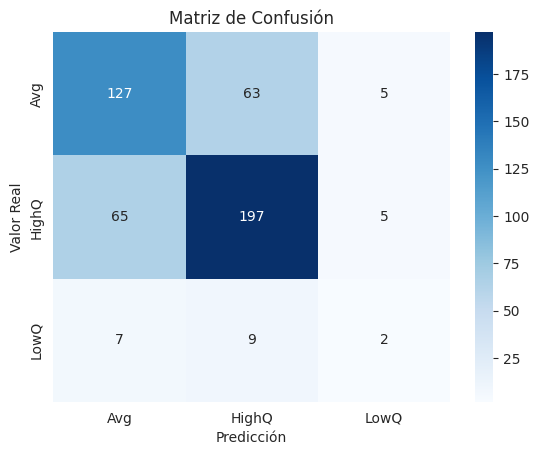

In [ ]:
cm = confusion_matrix(y_test_red, y_pred_red)

# Crear un mapa de calor de la matriz de confusión
axis_labels=["Avg","HighQ","LowQ"]
sns.heatmap(cm, annot=True, xticklabels=axis_labels, yticklabels=axis_labels, fmt='d', cmap='Blues')

plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

Con respecto a esta matriz de confusión, se observa una distribución más uniforme de las clasificaciones esencialmente en que a diferencia del modelo anterior, comienzan a aparecer datos clasificados como "low quality".

### 5-cross validation

In [ ]:
# Aplica el escalado estándar a los datos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_red.astype("float64"))
scaled_scores = cross_val_score(tree_red, X_train_scaled, y_train_red, scoring="accuracy")
# Imprime los resultados de precisión obtenidos en cada iteración
# Imprime el promedio de precisión del árbol de decisión
print(scaled_scores)
print(f"El promedio de accuracy del árbol de decisión es de {round(scaled_scores.mean(), 2)}, con una desviación estándar de: {round(scaled_scores.std(), 2)}")

[0.65178571 0.66964286 0.71428571 0.71875    0.7309417 ]
El promedio de accuracy del árbol de decisión es de 0.7, con una desviación estándar de: 0.03


### Visualización de árbol

A continuación se presenta el árbol formado por el modelo anteriormente implementado, para visualizar de mejor manera los atributos seleccionados para cada generación de subset de datos en cada nodo.

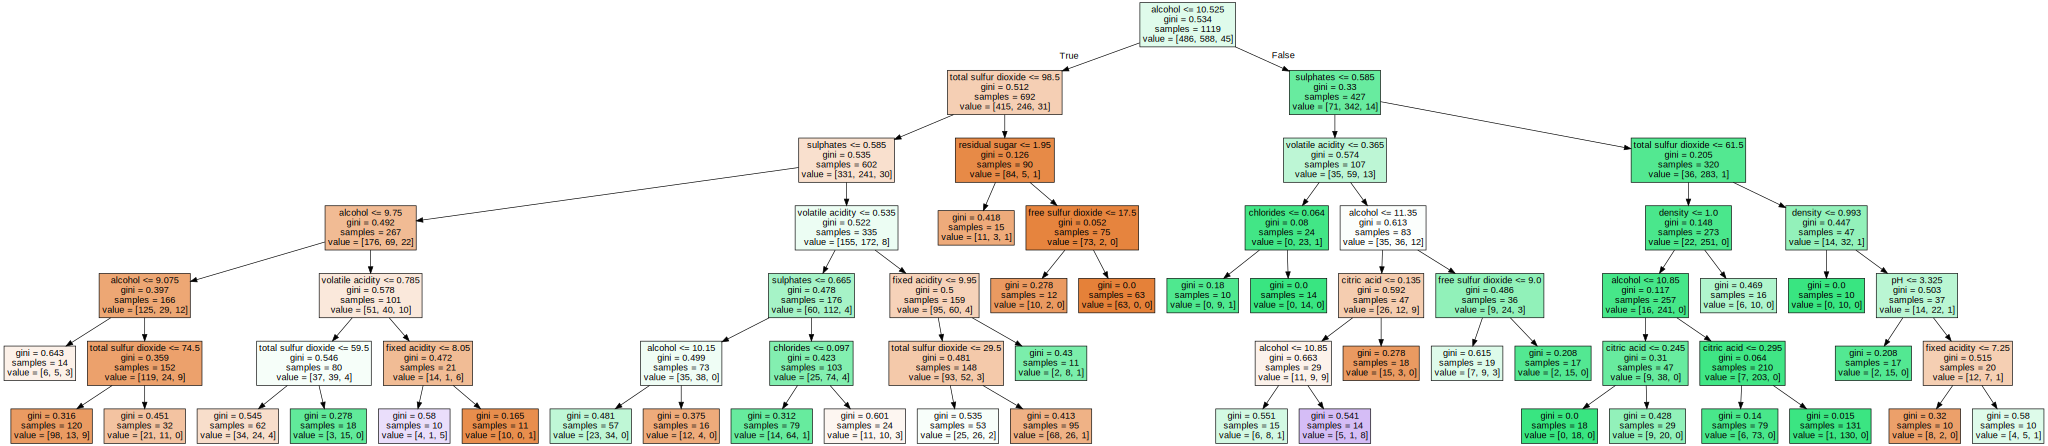

In [ ]:
# # Genera una representación en formato DOT del árbol de decisión
dot_data = export_graphviz(tree_red,
                           feature_names=X_train_red.columns,
                           filled=True,
                           max_depth=6,
                           impurity=True
                           )
graph = graphviz.Source(dot_data)
display(graph)

Observando el árbol, se puede observar cómo los atributos escogidos para realizar las particiones se condicen con aquellas características que tienen una mayor correlación con la calidad del vino, como se pudo observar en el EDA realizado.

## Random Forest Dataset Red

Para la implementación de random forest, se probaron distintos valores para los hiperparámetros, sin embargo se decidió por mantener solamente `max_depth` con un valor específico para conservar el carácter aleatorio del algoritmo y que se permita considerar una amplia gama de opciones para la generación de predicciones.

In [ ]:
X_red = dataset_red.drop('quality', axis=1)
y_red = dataset_red['quality']

# Transforma los valores en etiquetas categóricas:
# "lowquality" si el valor es menor a 5
# "average" si es igual a 5
# "highquality" en caso contrario.
y_red = y_red.apply(lambda x: 'lowquality' if x < 5 else 'average' if x == 5 else 'highquality')
# Realiza la división de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_red, y_red, test_size=0.3)

rf = RandomForestClassifier(max_depth=6)
rf.fit(X_train, y_train)
# Realiza predicciones en el conjunto de prueba.
y_pred = rf.predict(X_test)

# Genera informe de clasificación
reporte_dic=classification_report(y_test, y_pred,zero_division=0,output_dict=True)

# Generacion de la tabla de valores
df = pd.DataFrame(reporte_dic)
columnas_seleccionadas = ['highquality','average', 'lowquality']
df_seleccionado = df[columnas_seleccionadas]
df_seleccionado = df_seleccionado.round(2)
df_seleccionado = df_seleccionado.reset_index()
df_seleccionado = df_seleccionado.drop([3])
df_seleccionado_forest = df_seleccionado.rename(columns={'highquality': 'hq_forest','average': 'average_forest','lowquality': 'lq_forest'})

### Matriz de confusión

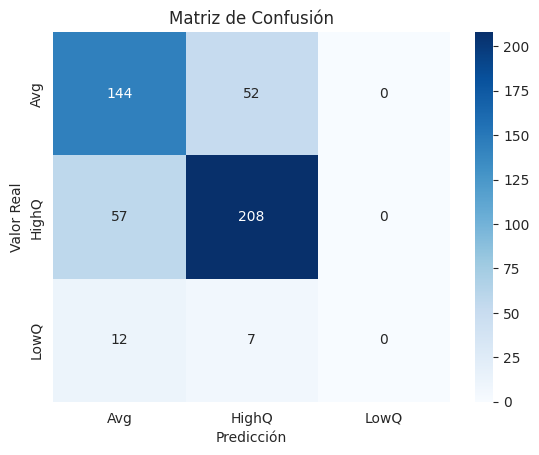

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Crear un mapa de calor de la matriz de confusión
axis_labels=["Avg","HighQ","LowQ"]
sns.heatmap(cm, annot=True, xticklabels=axis_labels, yticklabels=axis_labels, fmt='d', cmap='Blues')

plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

Para el caso de esta matriz de confusión, se observa un aumento leve de  acierto para el caso de "average", "highQ" y una desaparición para el caso "lowQ".

Esto se explica debido a la poca cantidad de ejemplos correspondientes a esta última clase, es por esto que la mayoría de veces se opta por clasificarla como "average" que serían los valores más cercanos.

Es importante destacar para efectos de este modelo que esta distribición puede experimentar cambios dependiendo de su ejecución debido a su característica aleatoria.

### 5-fold cross validation

In [ ]:
# Aplica el escalado estándar a los datos de entrenamiento:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
# Realiza la validación cruzada
scaled_scores = cross_val_score(rf, X_train_scaled, y_train, scoring="accuracy")

# Imprime los resultados de precisión obtenidos
print(scaled_scores)
# Imprime el promedio de precisión del árbol de decisión
print(f"El promedio de accuracy del Random Forest es de {round(scaled_scores.mean(), 2)}, con una desviación estándar de: {round(scaled_scores.std(), 2)}")

[0.73214286 0.78571429 0.71428571 0.75       0.72197309]
El promedio de accuracy del Random Forest es de 0.74, con una desviación estándar de: 0.03


### Visualización Random Forest

En este caso observamos uno de los árboles pertenecientes al random forest, entendiendo la premisa de este algoritmo, se observa cómo este árbol en particular no utiliza el alcohol como primer criterio de separación, el cual se esperaría que fuese la mejor opción, sino que elige total sulfur dioxide, que está dentro de las características dentro de las posibles opciones que son seleccionadas aleatoriamente.

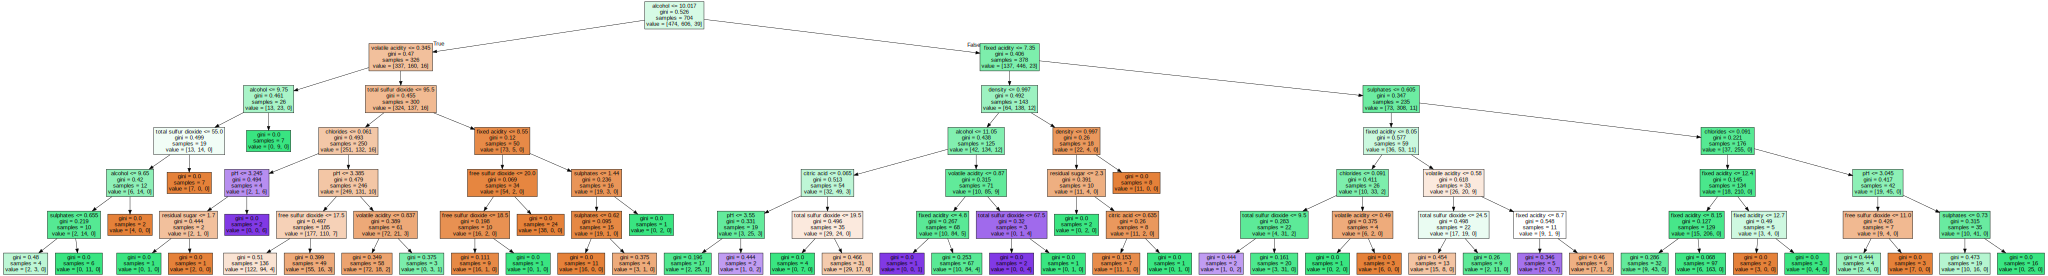

In [ ]:
# Genera una representación en formato DOT del árbol de decisión
tree = rf.estimators_[0]
dot_data = export_graphviz(tree,
                           feature_names=X_train.columns,
                           filled=True,
                           max_depth=6,
                           impurity=True)
graph = graphviz.Source(dot_data)
display(graph)

Para el caso de este árbol por ejemplo, se puede visualizar cómo el primer valor elegido es "sulphates".

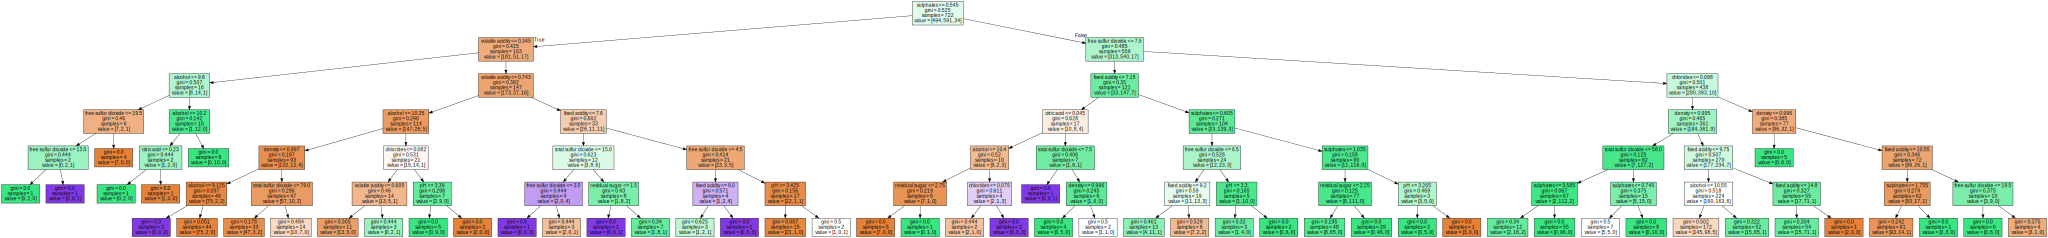

In [ ]:
tree = rf.estimators_[25]
dot_data = export_graphviz(tree,
                           feature_names=X_train.columns,
                           filled=True,
                           max_depth=6,
                           impurity=True)
graph = graphviz.Source(dot_data)
display(graph)

## Tabla Comparación Dataset Red

In [ ]:
df_merge = pd.merge(df_seleccionado_Arbol, df_seleccionado_SVM, on='index')
df_merge2 = pd.merge(df_merge, df_seleccionado_forest, on='index')
columnas=['index','hq_SVM','hq_Arbol','hq_forest','average_SVM','average_Arbol','average_forest','lq_SVM','lq_Arbol','lq_forest']
df_merge2=df_merge2[columnas]
df_merge2=df_merge2.rename(columns={'index': 'Clase'})
display(df_merge2)

,Clase,hq_SVM,hq_Arbol,hq_forest,average_SVM,average_Arbol,average_forest,lq_SVM,lq_Arbol,lq_forest
0,precision,0.75,0.73,0.83,0.63,0.64,0.73,0.0,0.17,0.0
1,recall,0.72,0.74,0.82,0.72,0.65,0.81,0.0,0.11,0.0
2,f1-score,0.73,0.74,0.82,0.67,0.64,0.77,0.0,0.13,0.0


Con respecto a la comparación final de estos tres modelos, se concluye que el modelo basado en random forest obtiene una clara ventaja en todas las métricas, lo cual demuestra una superioridad para efectos de esta primera parte del laboratorio, esto se explica debido a la cantidad de árboles que genera (en principio 100, debido a la implementación que utiliza sci-kit learn), lo cual le permite un mejor entrenamiento a través de técnicas como el bagging.

Es importante volver a recalcar que el modelo de random forest pudiese experimentar cambios en su desempeño dependiendo de la ejecución del programa fuente, debido a su caracter aleatorio. Durante las diversas ejecuciones de este laboratorio se observaron casos que arrojaron distintos tipos de resultados, en algunos incluso añadiendo la clasifiación de datos como "lowQ".

A pesar de la aleatoriedad mencionada, el algoritmo random forest en todas las ejecuciones representa el modelo con mejores resultados en cuanto a las métricas utilizadas.

Por último, se observa que el modelo basado en árboles de decisión es el único en obtener métricas sobre la clase "lowQ", si bien esto se podría considerar como un resultado favorable para este, también a su vez podría demostrar un *overfitting* a los datos de entrenamiento, lo cual es una característica negativa altamente presente en este algoritmo.

## Clasificación SVM Dataset White

Para este nuevo caso, se utiliza el mismo modelo de sci-kit learn implementado anteriormente.

In [ ]:
# Crea la variable "X_white" asignándole el DataFrame dataset_white sin la columna "quality".
X_white = dataset_white.drop('quality', axis=1)
# rea la variable y_whire asignándole la columna "quality" del DataFrame.
y_white = dataset_white['quality']

# Transforma los valores de y_white asignando las etiquetas
# "lowquality" si el valor es menor a 5
# "average" si es igual a 5
# "highquality" en caso contrario.
y_white = y_white.apply(lambda x: 'lowquality' if x < 5 else 'average' if x == 5 else 'highquality')

# Realiza la división de los datos en conjuntos de entrenamiento y prueba
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.3, random_state=42)

# Crea una instancia de la clase SVC
svm_white = SVC(kernel="poly", degree=5, coef0=1, C=5)

# Ajusta el modelo utilizando los datos de entrenamiento
svm_white.fit(X_train_white, y_train_white)

# Realizar predicciones en el conjunto de prueba
y_pred_white = svm_white.predict(X_test_white)

# Genera informe de clasificación
reporte_dic=classification_report(y_test_white, y_pred_white,zero_division=0,output_dict=True)

# Generacion de la tabla de valores
df = pd.DataFrame(reporte_dic)
columnas_seleccionadas = ['highquality','average', 'lowquality']
df_seleccionado = df[columnas_seleccionadas]
df_seleccionado = df_seleccionado.round(2)
df_seleccionado = df_seleccionado.reset_index()
df_seleccionado = df_seleccionado.drop([3])
df_seleccionado_SVM_white = df_seleccionado.rename(columns={'highquality': 'hq_SVM','average': 'average_SVM','lowquality': 'lq_SVM'})

### Matriz de confusión

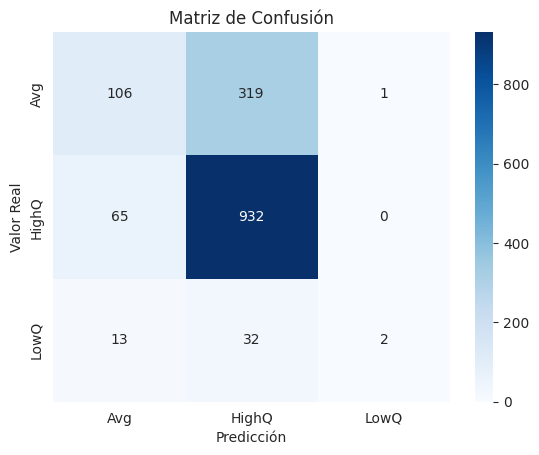

In [ ]:
# Calcula la matriz de confusión
# almacena los resultados
cm = confusion_matrix(y_test_white, y_pred_white)

# Crear un mapa de calor de la matriz de confusión
axis_labels=["Avg","HighQ","LowQ"]
sns.heatmap(cm, annot=True, xticklabels=axis_labels, yticklabels=axis_labels, fmt='d', cmap='Blues')

plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

Para esta implementación, se puede observar cómo a diferencia del SVM implementado en la sección de vinos rojos, en este caso el mismo modelo realiza una peor clasificación de los datos.

Se mantiene la tendencia a marcar los datos esta vez mayoritariamente como "highQ", pero destaca la aparición en este caso de clasificaciones "lowQ". Esto debido al aumento significativo de la cantidad de datos respecto del dataset anterior, lo cual permite una leve mejora en el entrenamiento de este modelo.

### 5-fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
# Aplica el escalado estándar a los datos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_white.astype("float64"))
scaled_scores = cross_val_score(svm_white, X_train_scaled, y_train_white, scoring="accuracy")

# Imprime los resultados de precisión obtenidos
print(scaled_scores)
# Imprime el promedio de precisión del SVM
print(f"El promedio de accuracy del SVM es de {round(scaled_scores.mean(), 2)}, con una desviación estándar de: {round(scaled_scores.std(), 2)}")

[0.76239067 0.74635569 0.73469388 0.74160584 0.73430657]
El promedio de accuracy del SVM es de 0.74, con una desviación estándar de: 0.01


## Árbol de decisión Dataset White

El modelo de árbol de decisión es el mismo que se utilizó en la sección anterior.

In [ ]:
X_white = dataset_white.drop('quality', axis=1)
y_white = dataset_white['quality']

# Transforma los valores de y_red asignando las etiquetas
# "lowquality" si el valor es menor a 5
# "average" si es igual a 5
# "highquality" en caso contrario.
y_white = y_white.apply(lambda x: 'lowquality' if x < 5 else 'average' if x == 5 else 'highquality')

X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.3, random_state=42)

tree_white = DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, random_state=42)
tree_white.fit(X_train_white, y_train_white)

# Realizar predicciones en el conjunto de prueba
y_pred_white = tree_white.predict(X_test_white)

# Genera informe de clasificación
reporte_dic=classification_report(y_test_white, y_pred_white,zero_division=0,output_dict=True)

# Generacion de la tabla de valores
df = pd.DataFrame(reporte_dic)
columnas_seleccionadas = ['highquality','average', 'lowquality']
df_seleccionado = df[columnas_seleccionadas]
df_seleccionado = df_seleccionado.round(2)
df_seleccionado = df_seleccionado.reset_index()
df_seleccionado = df_seleccionado.drop([3])
df_seleccionado_Arbol_white = df_seleccionado.rename(columns={'highquality': 'hq_Arbol','average': 'average_Arbol','lowquality': 'lq_Arbol'})

### Matriz de confusión

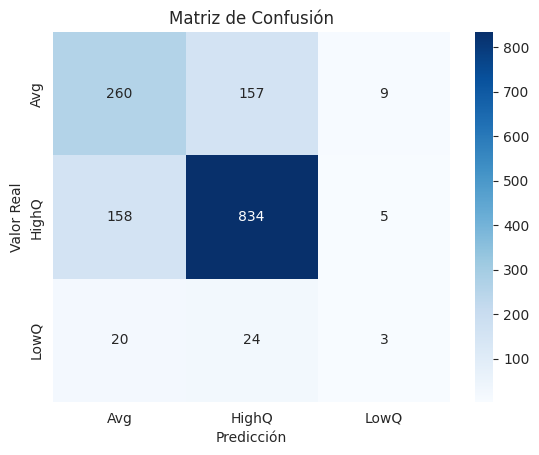

In [ ]:
cm = confusion_matrix(y_test_white, y_pred_white)

# Crear un mapa de calor de la matriz de confusión
axis_labels=["Avg","HighQ","LowQ"]
sns.heatmap(cm, annot=True, xticklabels=axis_labels, yticklabels=axis_labels, fmt='d', cmap='Blues')

plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

Para el árbol de decisión, observamos una matriz de confusión con una distribución parecida a la obtenida para el dataset anterior, con un alto acierto para las clases "average" y "highQ".

### 5-fold cross validation

In [ ]:
# Aplica el escalado estándar a los datos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_white.astype("float64"))
scaled_scores = cross_val_score(tree_red, X_train_scaled, y_train_white, scoring="accuracy")
#Imprime los resultados de precisión obtenidos en cada iteración
# Imprime el promedio de precisión del árbol de decisión
print(scaled_scores)
print(f"El promedio de accuracy del árbol de decisión es de {round(scaled_scores.mean(), 2)}, con una desviación estándar de: {round(scaled_scores.std(), 2)}")

[0.70262391 0.73760933 0.70845481 0.70656934 0.68613139]
El promedio de accuracy del árbol de decisión es de 0.71, con una desviación estándar de: 0.02


### Visualización de Árbol

Para este árbol generado, se mantiene el uso del alcohol como la característica diferencial en primera instancia para realizar la partición inicial de los datos, y de igual manera que para el árbol de vinos rojos, si bien las características altamente correlacionadas con la calidad del vino no se observan en los niveles más altos del árbol, a medida que este va creciendo, estas características adquieren mayor relevancia en las distintas separaciones.

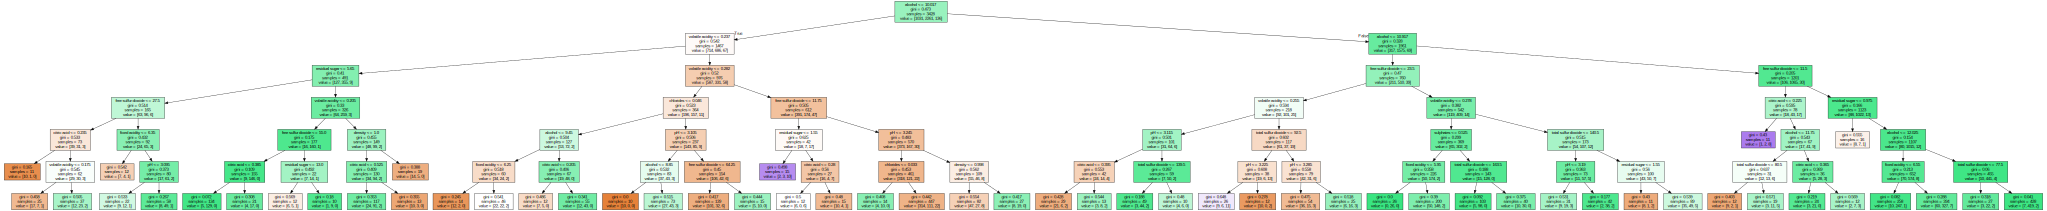

In [ ]:
# Genera una representación en formato DOT del árbol de decisión
dot_data = export_graphviz(tree_white,
                           feature_names=X_train_white.columns,
                           filled=True,
                           max_depth=6,
                           impurity=True
                           )
graph = graphviz.Source(dot_data)
display(graph)

## Random Forest Dataset White

In [ ]:
X_white = dataset_white.drop('quality', axis=1)
y_white = dataset_white['quality']

# Transforma los valores en etiquetas categóricas:
# "lowquality" si el valor es menor a 5
# "average" si es igual a 5
# "highquality" en caso contrario.
y_white = y_white.apply(lambda x: 'lowquality' if x < 5 else 'average' if x == 5 else 'highquality')

# Realiza la división de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_white, y_white, test_size=0.3)

rf = RandomForestClassifier(max_depth=6)
rf.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba.
y_pred = rf.predict(X_test)

# Genera informe de clasificación
reporte_dic=classification_report(y_test, y_pred,zero_division=0,output_dict=True)

# Generacion de la tabla de valores
df = pd.DataFrame(reporte_dic)
columnas_seleccionadas = ['highquality','average', 'lowquality']
df_seleccionado = df[columnas_seleccionadas]
df_seleccionado = df_seleccionado.round(2)
df_seleccionado = df_seleccionado.reset_index()
df_seleccionado = df_seleccionado.drop([3])
df_seleccionado_forest_white = df_seleccionado.rename(columns={'highquality': 'hq_forest','average': 'average_forest','lowquality': 'lq_forest'})

### Matriz de confusión

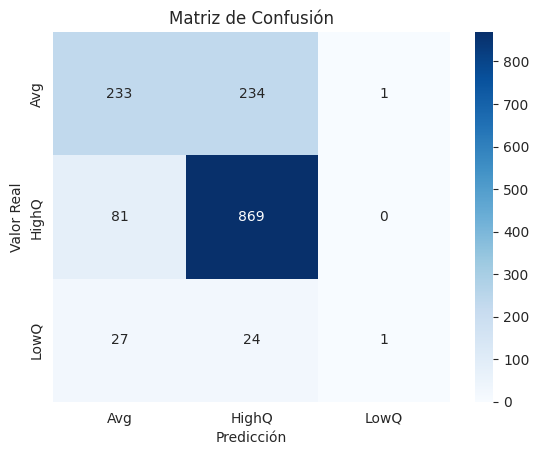

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Crear un mapa de calor de la matriz de confusión
axis_labels=["Avg","HighQ","LowQ"]
sns.heatmap(cm, annot=True, xticklabels=axis_labels, yticklabels=axis_labels, fmt='d', cmap='Blues')

plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

Para la matriz de confusión de este segundo dataset, observamos una distribución más uniforme de las clasificaciones obtenidas. El ratio de aciertos para la clase "lowQ" se mantiene bajo, se mantienen calificando mayoritariamente como "average".

Es importante destacar que existe una alta cantidad de datos "lowQ" que son catalogados como "highQ", lo cual podría representar un problema pensando en un contexto de la realidad.

### 5-fold cross validation

In [ ]:
# Aplica el escalado estándar a los datos de entrenamiento:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
scaled_scores = cross_val_score(rf, X_train_scaled, y_train, scoring="accuracy")
# Imprime los resultados de precisión obtenidos
print(scaled_scores)
# Imprime el promedio de precisión del árbol de decisión
print(f"El promedio de accuracy del Random Forest es de {round(scaled_scores.mean(), 2)}, con una desviación estándar de: {round(scaled_scores.std(), 2)}")

[0.78571429 0.74344023 0.7638484  0.7620438  0.75912409]
El promedio de accuracy del Random Forest es de 0.76, con una desviación estándar de: 0.01


### Visualización Random Forest

En este caso y al igual que para el dataset anterior, se escoge una característica al azar para realizar la primera partición de los datos en este árbol en particular, se procederá a mostrar otro árbol perteneciente al bosque generado para observar las diferencias entre estos. Para el caso de este árbol, la característica aleatoria seleccionada es la densidad del vino.

Es importante destacar que aún así corresponde a un atributo con alta correlación con la calidad final del vino

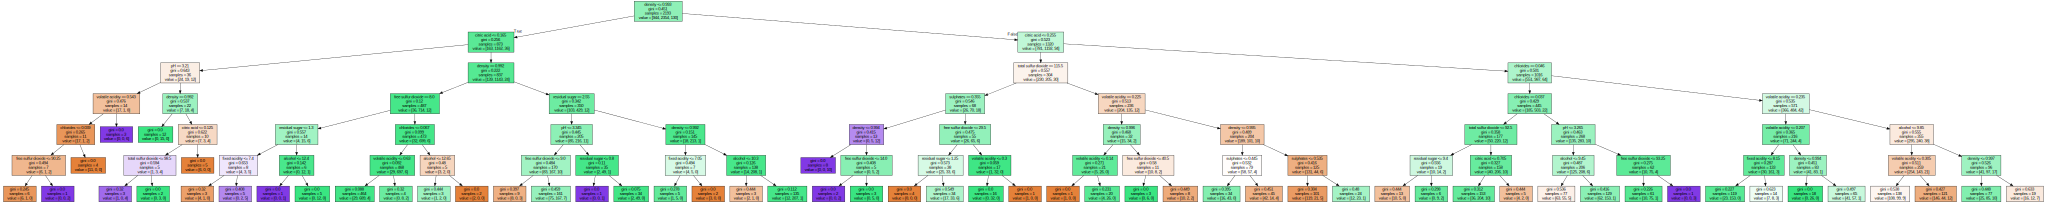

In [ ]:
# Genera una representación en formato DOT del árbol de decisión
tree = rf.estimators_[0]
dot_data = export_graphviz(tree,
                           feature_names=X_train.columns,
                           filled=True,
                           max_depth=6,
                           impurity=True)
graph = graphviz.Source(dot_data)
display(graph)


Para el caso de este árbol por ejemplo, se puede visualizar cómo el segundo valor elegido es efectivamente la mejor característica a utilizar dentro de las posibilidades que vendría siendo el alcohol.

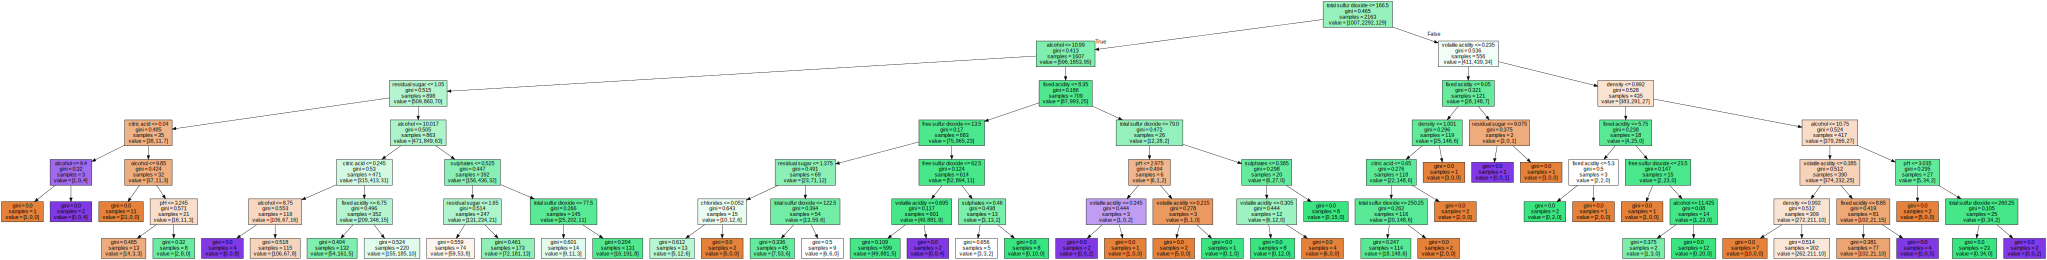

In [ ]:
tree = rf.estimators_[23]
dot_data = export_graphviz(tree,
                           feature_names=X_train.columns,
                           filled=True,
                           max_depth=6,
                           impurity=True)
graph = graphviz.Source(dot_data)
display(graph)

## Tabla Comparación Dataset White

In [ ]:
df_merge = pd.merge(df_seleccionado_Arbol_white, df_seleccionado_SVM_white, on='index')
df_merge2 = pd.merge(df_merge, df_seleccionado_forest_white, on='index')
columnas=['index','hq_SVM','hq_Arbol','hq_forest','average_SVM','average_Arbol','average_forest','lq_SVM','lq_Arbol','lq_forest']
df_merge2=df_merge2[columnas]
df_merge2=df_merge2.rename(columns={'index': 'Clase'})
display(df_merge2)

,Clase,hq_SVM,hq_Arbol,hq_forest,average_SVM,average_Arbol,average_forest,lq_SVM,lq_Arbol,lq_forest
0,precision,0.73,0.82,0.77,0.58,0.59,0.68,0.67,0.18,0.50
1,recall,0.93,0.84,0.91,0.25,0.61,0.50,0.04,0.06,0.02
2,f1-score,0.82,0.83,0.84,0.35,0.60,0.58,0.08,0.09,0.04


Para este caso, al analizar los resultados de las métricas, se observan diferencias menos claras en los resultados obtenidos por cada algoritmo, ya que dependiendo de la clase, un modelo se comporta mejor que el resto, sin estar en presencia de una ventaja significativa como para el caso de los vinos rojos.

El modelo random forest se mantiene como el que presume una mayor precisión en casi todas las clasificaciones, excepto en la categoría "lowQ", en la cual el modelo SVM saca una ventaja amplia, sin embargo es necesario notar que asimismo el recall de este modelo es mayor, con lo cual es de esperarse ese aumento en la presición.

## Conclusiones finales


* Durante la realización de este laboratorio, se consideró el uso de k-fold cross validation como una medida del accuracy de cada algoritmo, pero se llegó a la conclusión que los resultados por parte de este no eran lo suficientemente significativos para servir como una métrica relevante para evaluar cada algoritmo. Esencialmente porque hubieron ejecuciones en donde el mdelo SVM se comportaba como una especie de "algoritmo dummy" el cual solo calificaba los datos como "highQ" y aún así obtenía un accuracy cercano al algoritmo random forest, lo cual sirvió como argumento para desestimar esta métrica.

* Es importante mencionar que todas los resultados expuestos en este laboratorio estarían faltos de contexto sin saber los requerimientos del negocio donde se aplicarían. Para efectos de este laboratorio, se asume que es preferible que los modelos califiquen a los vinos "lowQ" correctamente o bien como "average" antes que como "highQ", lo cual sería un grave error colocándolo en un contexto de la vida real.

* Se observa cómo para problemas con una cantidad reducida de datos el modelo random forest es claramente la mejor opción, a medida que se aumentan los datos de entrenamiento los otros dos algoritmos adquieren mayor eficacia, sin embargo esto se puede deber al ovefitting, sacrificando así la generalización y aún así no se logra una ventaja significativa.

Teniendo en cuenta las métricas obtenidas y lo anteriormente expuesto, es que se podría concluir que el algoritmo random forest es el modelo más robusto dentro de las opciones presentadas a lo largo del laboratorio, esencialmente por la regularidad de sus resultados, como también su alta capacidad de generalización, además porque asegura precisión y un recall soportable dentro de los contextos supuestos.